In [1]:

start = (-31.732, -60.5238)
end = (-31.732, -60.5238)
stop1 = (-32.4075, -60.5238)
stop2 = (-33.1307, -60.5238)
stop3 = (-31.732, -60.5238)
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


596

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=00895ae87a91db8443a4a3791fa7721c


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | matara
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | kimbe
Processing Record 12 of Set 1 | deputatskiy
Processing Record 13 of Set 1 | dinsor
City not found. Skipping...
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | gidole
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | lazaro cardenas
Processing Record 21 of Set 1 | albany
Processing Recor

Processing Record 37 of Set 4 | kuche
City not found. Skipping...
Processing Record 38 of Set 4 | noormarkku
Processing Record 39 of Set 4 | vila velha
Processing Record 40 of Set 4 | lerwick
Processing Record 41 of Set 4 | tacuarembo
Processing Record 42 of Set 4 | leh
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | kandrian
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | jardim
Processing Record 47 of Set 4 | hihifo
City not found. Skipping...
Processing Record 48 of Set 4 | shemonaikha
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | naze
Processing Record 1 of Set 5 | makakilo city
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | praia da vitoria
Processing Record 5 of Set 5 | poronaysk
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | saint george
Processing Record 8 of Set 5 | stony plain
Processing

Processing Record 25 of Set 8 | kotaparh
Processing Record 26 of Set 8 | northam
Processing Record 27 of Set 8 | sydney
Processing Record 28 of Set 8 | agirish
Processing Record 29 of Set 8 | estrela
Processing Record 30 of Set 8 | nieuw amsterdam
Processing Record 31 of Set 8 | praxedis guerrero
Processing Record 32 of Set 8 | sept-iles
Processing Record 33 of Set 8 | grindavik
Processing Record 34 of Set 8 | mahanoro
Processing Record 35 of Set 8 | zelenoborsk
Processing Record 36 of Set 8 | sao filipe
Processing Record 37 of Set 8 | morant bay
Processing Record 38 of Set 8 | gayny
Processing Record 39 of Set 8 | tautira
Processing Record 40 of Set 8 | pochutla
Processing Record 41 of Set 8 | trincomalee
Processing Record 42 of Set 8 | teguldet
Processing Record 43 of Set 8 | port victoria
Processing Record 44 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 45 of Set 8 | zarand
Processing Record 46 of Set 8 | yongan
Processing Record 47 of Set 8 | yumen
Processing R

Processing Record 10 of Set 12 | prata
Processing Record 11 of Set 12 | locri
Processing Record 12 of Set 12 | neuquen
Processing Record 13 of Set 12 | znamenskoye
Processing Record 14 of Set 12 | hanyang
Processing Record 15 of Set 12 | trelew
Processing Record 16 of Set 12 | izhmorskiy
Processing Record 17 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 18 of Set 12 | novogurovskiy
Processing Record 19 of Set 12 | hohhot
Processing Record 20 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 21 of Set 12 | portel
Processing Record 22 of Set 12 | ipixuna
Processing Record 23 of Set 12 | cayenne
Processing Record 24 of Set 12 | mount gambier
Processing Record 25 of Set 12 | saint andrews
Processing Record 26 of Set 12 | kuala kangsar
Processing Record 27 of Set 12 | port augusta
Processing Record 28 of Set 12 | sarangani
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | humaita
Processi

In [8]:
len(city_data)

537

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,37.40,93,75,59.84,AR,2021-05-01 03:34:58
1,Yellowknife,62.4560,-114.3525,30.20,100,90,10.36,CA,2021-05-01 03:34:58
2,Saskylakh,71.9167,114.0833,33.12,99,100,7.78,RU,2021-05-01 03:34:59
3,Okhotsk,59.3833,143.3000,36.05,78,100,3.09,RU,2021-05-01 03:34:59
4,Banda Aceh,5.5577,95.3222,86.72,65,60,7.81,ID,2021-05-01 03:35:00
5,Mataura,-46.1927,168.8643,55.99,73,65,3.00,NZ,2021-05-01 03:35:00
6,Saint-Philippe,-21.3585,55.7679,75.20,78,0,3.44,RE,2021-05-01 03:35:00
7,Ribeira Grande,38.5167,-28.7000,59.85,83,100,12.57,PT,2021-05-01 03:35:01
8,Matara,5.9485,80.5353,85.64,69,18,2.01,LK,2021-05-01 03:35:01
9,Puerto Ayora,-0.7393,-90.3518,74.17,83,2,6.78,EC,2021-05-01 03:35:02


In [10]:
city_data_columns = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-01 03:34:58,-54.8000,-68.3000,37.40,93,75,59.84
1,Yellowknife,CA,2021-05-01 03:34:58,62.4560,-114.3525,30.20,100,90,10.36
2,Saskylakh,RU,2021-05-01 03:34:59,71.9167,114.0833,33.12,99,100,7.78
3,Okhotsk,RU,2021-05-01 03:34:59,59.3833,143.3000,36.05,78,100,3.09
4,Banda Aceh,ID,2021-05-01 03:35:00,5.5577,95.3222,86.72,65,60,7.81
5,Mataura,NZ,2021-05-01 03:35:00,-46.1927,168.8643,55.99,73,65,3.00
6,Saint-Philippe,RE,2021-05-01 03:35:00,-21.3585,55.7679,75.20,78,0,3.44
7,Ribeira Grande,PT,2021-05-01 03:35:01,38.5167,-28.7000,59.85,83,100,12.57
8,Matara,LK,2021-05-01 03:35:01,5.9485,80.5353,85.64,69,18,2.01
9,Puerto Ayora,EC,2021-05-01 03:35:02,-0.7393,-90.3518,74.17,83,2,6.78


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

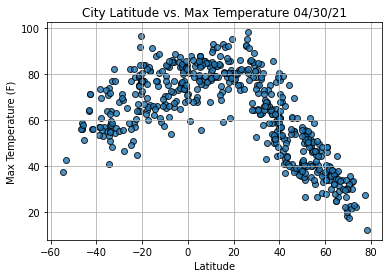

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

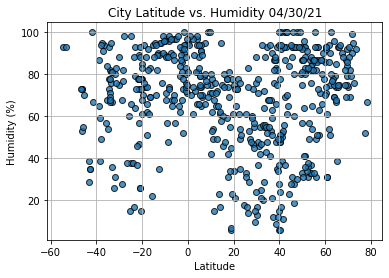

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

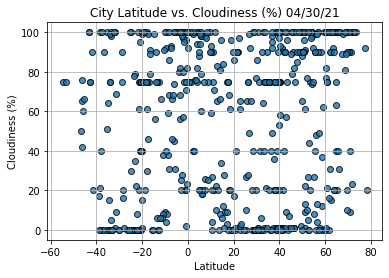

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

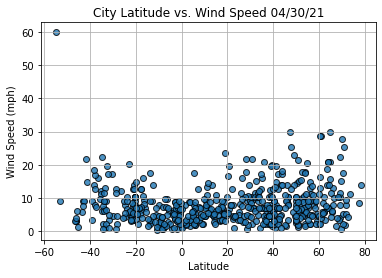

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                       Gidole
Country                        ET
Date          2021-05-01 03:35:05
Lat                          5.65
Lng                       37.3667
Max Temp                    55.67
Humidity                       91
Cloudiness                     98
Wind Speed                   2.51
Name: 13, dtype: object

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [38]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Yellowknife,CA,2021-05-01 03:34:58,62.4560,-114.3525,30.20,100,90,10.36
2,Saskylakh,RU,2021-05-01 03:34:59,71.9167,114.0833,33.12,99,100,7.78
3,Okhotsk,RU,2021-05-01 03:34:59,59.3833,143.3000,36.05,78,100,3.09
4,Banda Aceh,ID,2021-05-01 03:35:00,5.5577,95.3222,86.72,65,60,7.81
7,Ribeira Grande,PT,2021-05-01 03:35:01,38.5167,-28.7000,59.85,83,100,12.57


In [39]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-05-01 03:34:58,-54.8000,-68.3000,37.40,93,75,59.84
5,Mataura,NZ,2021-05-01 03:35:00,-46.1927,168.8643,55.99,73,65,3.00
6,Saint-Philippe,RE,2021-05-01 03:35:00,-21.3585,55.7679,75.20,78,0,3.44
9,Puerto Ayora,EC,2021-05-01 03:35:02,-0.7393,-90.3518,74.17,83,2,6.78
10,Kimbe,PG,2021-05-01 03:35:03,-5.5502,150.1429,88.74,57,31,6.20


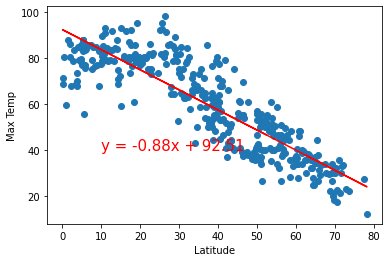

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

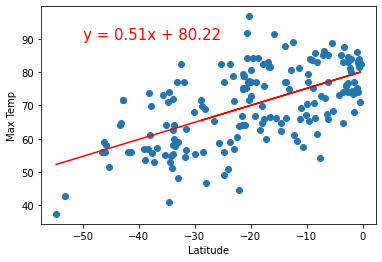

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


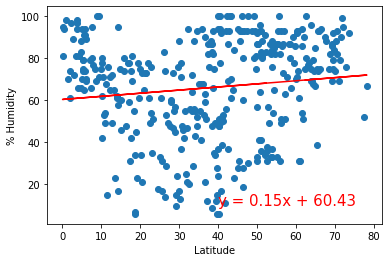

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

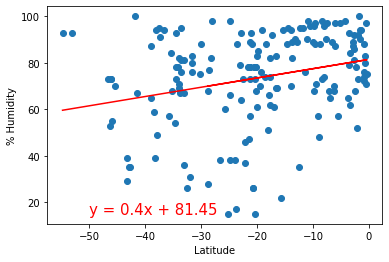

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


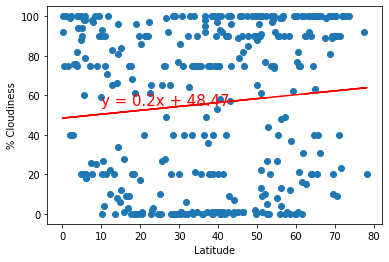

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

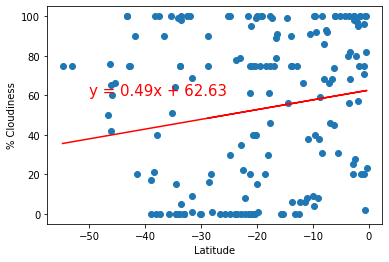

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


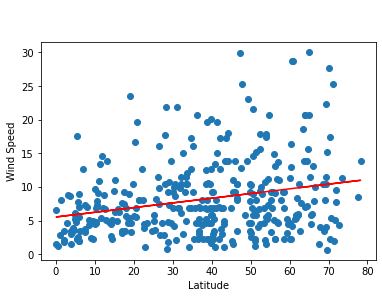

In [55]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

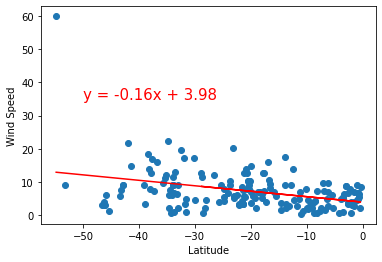

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
